<a href="https://colab.research.google.com/github/smriti192002/play_store_app/blob/main/EDA_PROJECT_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 



 

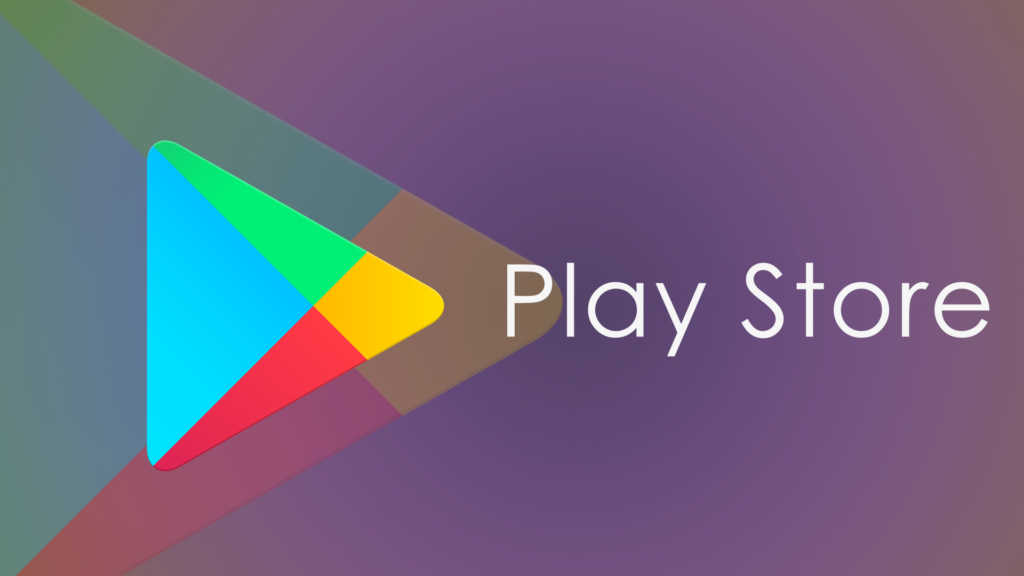

# **Description of App Dataset columns**



1 App : The name of the app

2 Category : The category of the app

3 Rating : The rating of the app in the Play Store

4 Reviews : The number of reviews of the app

5 Size : The size of the app

6 Install : The number of installs of the app

7 Type : The type of the app (Free/Paid)

8 The price of the app (0 if it is Free)

9 Content Rating :The appropiate target audience of the app

10 Genres: The genre of the app

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




# **Load Necessary Libraries**


In [ ]:
import matplotlib.pyplot as plt          
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **Exploring google play store data**



In [ ]:
#Reading the csv file 

df=pd.read_csv('/content/drive/MyDrive/Datasets/GG/Play Store Data.csv')


In [ ]:
#Top 5 rowsa of the dataset 

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#last rows of the dataset

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#No of rows and column of the dataset

df.shape

(10841, 13)

**there are a total of 10841 rows and 13 columns in this .csv file let's see the column type of our dataset**

In [ ]:
#info function will tell you the count of null values and the data type of our columns

df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type.**


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Let check the DataFrame for duplicate values 


In [ ]:
# df has 10841 observation before cleaning. 

df.shape 

(10841, 13)

In [ ]:
#df has 1181 duplicate App's before cleaning. 

df[df['App'].duplicated()]  



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [ ]:
#Dropping duplicate values

before = len(df.index)                                                                   #Length of original Dataframe 
print('Total entries with duplicates were '+ (str(before)))
ddf=df.drop_duplicates(subset=['App'], keep='first', inplace=False, ignore_index=True)   #Drop duplicates with a value in a specific column.
after = len(ddf.index)                                                                   #Length of duplicated Dataframe 
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 10841
Total entries after duplicates were dropped are 9660
Total 1181 entries were dropped.


In [ ]:
ddf # we have successfully removed duplicate values and the new shape of 9660 rows × 13 columns is realised. 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#Checking for duplicate values 


duplicate =ddf.groupby(['App']).agg({'Category': 'count'}).reset_index()  
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head(20)

,App,Category
0,"""i DT"" Fútbol. Todos Somos Técnicos.",1
6434,My Talking Tom,1
6436,My Teacher - Classroom Play,1
6437,My Telcel,1
6438,My Tele2,1
6439,My Theme Park: RollerCoaster & Water Park Tycoon,1
6440,My Truck,1
6441,My Virtual Boyfriend,1
6442,My Vodacom SA,1
6443,My Vodafone (GR),1


# Data   Cleaning
 “The more data we have, the more likely we are to drown in it.” 
 —Nassim Taleb
 
 “More data beats clever algorithms, but better data beats more data.” 
 — Peter Norvig`

### **Rating**

In [ ]:
ddf['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

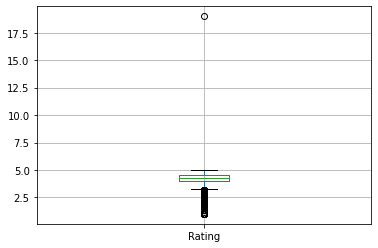

In [ ]:
ddf.boxplot() # Since rating can range from 1 to 5 we can observe the presence of an outlier. 

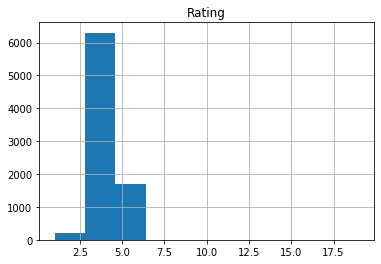

In [ ]:
ddf.hist();

In [ ]:
ddf[ddf.Rating>5] # We observe the data frame [9989] has shifted values. ['NaN' , 1.9 , 19.0 , '3.0M', '1,000+','Free', 0, 'Everyone'	, 'NaN', 'February 11, 2018' , '1.0.19' , 4.0  ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
ddf.drop([9300],inplace=True) # dropping the row to maintain logical consistency

In [ ]:
ddf.reset_index(drop=True, inplace=True) # resetting index after dropping column 

In [ ]:
ddf.iloc[9987:9995]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


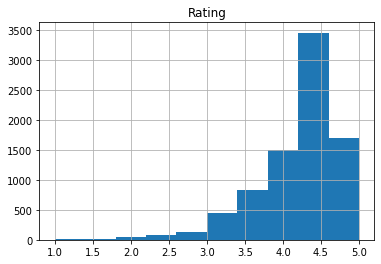

In [ ]:
ddf.hist(); # After treating the outlier we observe the rating values range from 1 to 5 

In [ ]:
ddf['Rating'].isnull().sum() # we observe there are 1465 null values in ratings column 

1463

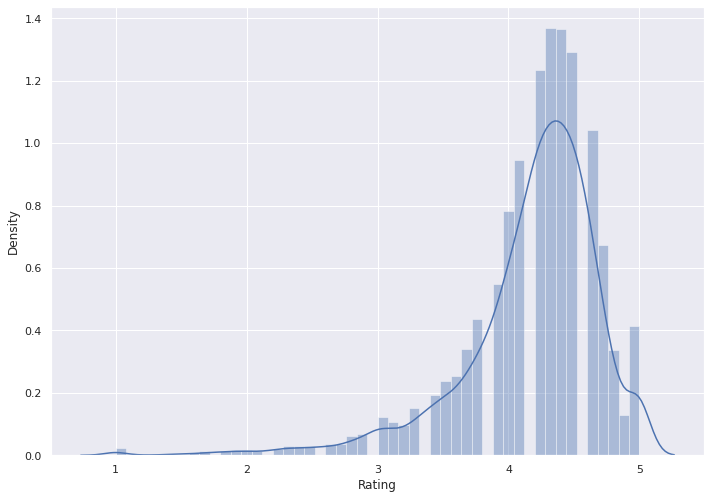

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot Before we fill nan values 
ax = sns.distplot(ddf['Rating'])

**From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8**


In [ ]:
impute_median=ddf['Rating'].median()                     # You may note that the data is skewed it is not recommended to use the mean for replacing the missing values
ddf['Rating']=ddf['Rating'].fillna(impute_median)      # Using mean values for replacing missing values may not create a great model and hence gets ruled out.

As the distribution is skewed we will impute through mode 
When the data is skewed, it is good to consider using the mode value for replacing the missing values

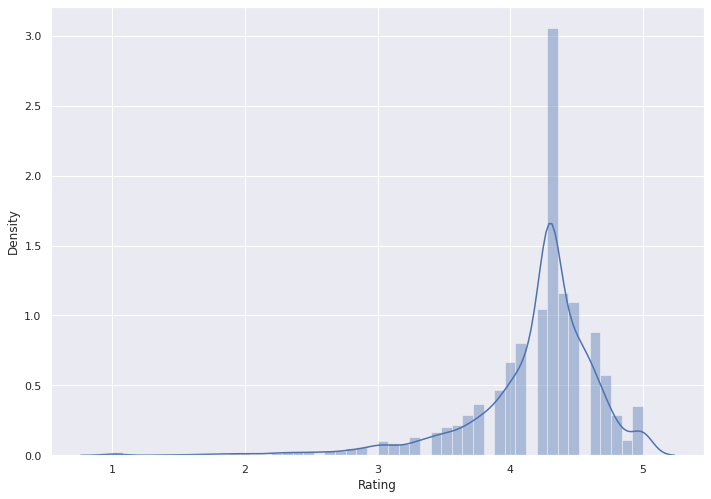

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot after we fill NaN values, we can observe little to no devation from the original plot. 
ax = sns.distplot(ddf['Rating'])

### **Install & Price**

In [ ]:
ddf[('Installs')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
ddf[('Price')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
   

Price

In [ ]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 

In [ ]:
ddf[('Price')].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
ddf['Price'].isnull().sum()# checking for null values 

0

In [ ]:
ddf[('Price')].describe() # We can observe that the data type is changed to float type 

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

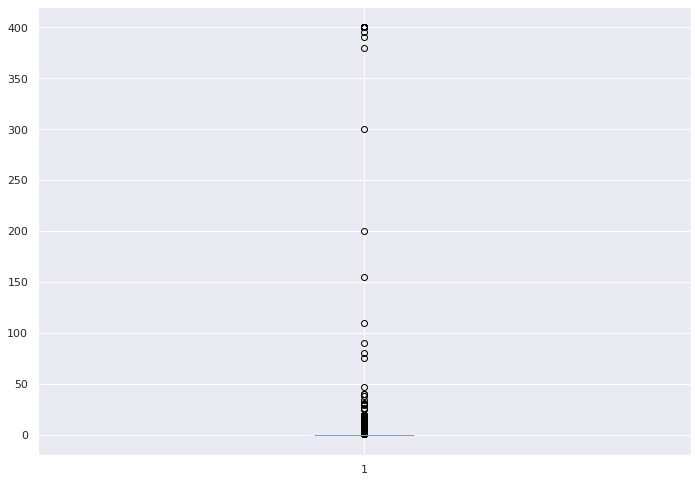

In [ ]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [ ]:
ddf.shape

(9659, 13)

In [ ]:
print(ddf[ddf.Price>100].shape)  # We observe that there are 20 apps which are outliers for price app 
Expen= ddf[ddf.Price>100]
Expen

(20, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3327,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3465,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4396,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4398,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4399,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
4400,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4401,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4402,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4403,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [ ]:
#ddf=ddf[ddf.Price<=100]

In [ ]:
ddf.shape #Shape of the Dataset changes from (10357, 13)

(9659, 13)

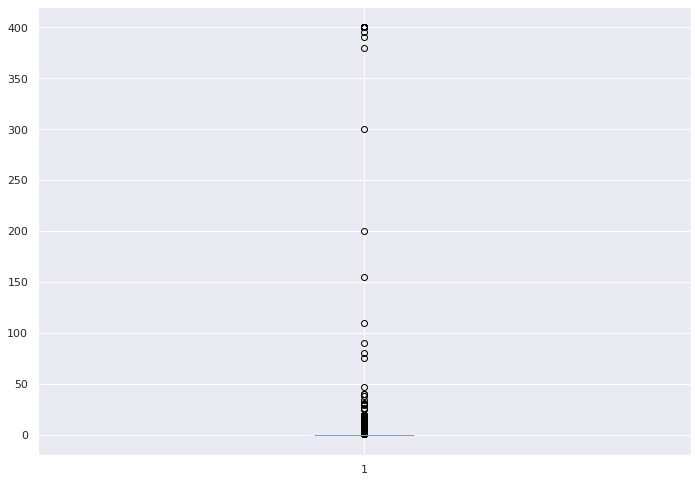

In [ ]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

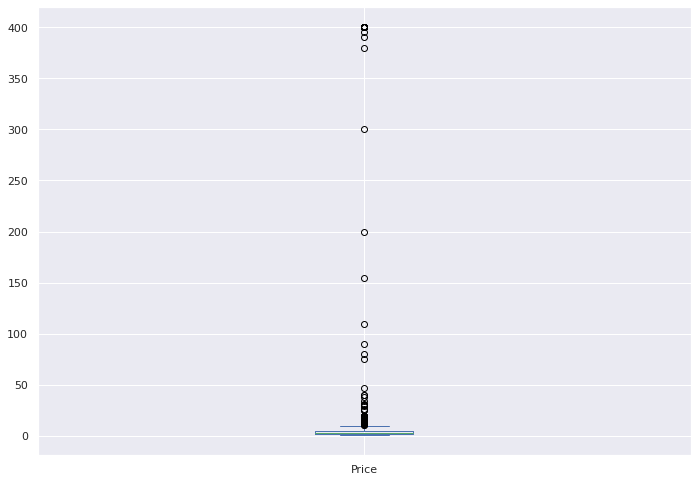

In [ ]:
ddf[ddf.Price>0].Price.plot.box() # Box plot of Paid apps
plt.show()


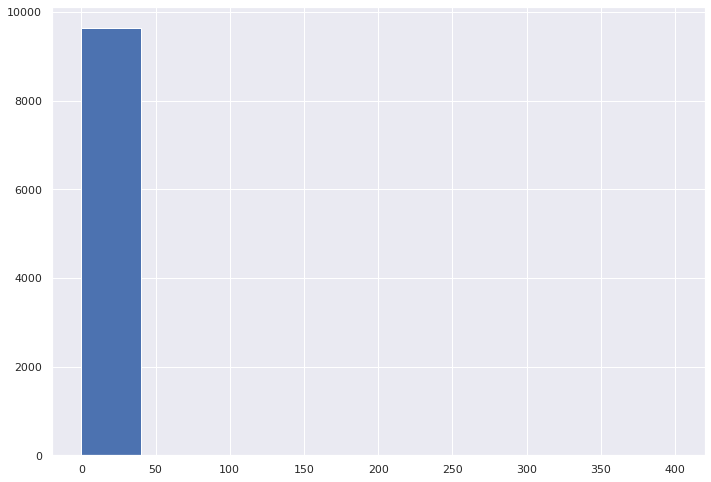

In [ ]:
plt.hist(ddf.Price)
plt.show()

In [ ]:
#ddf[ddf.Price > 30]

In [ ]:
#print(ddf[ddf.Price > 30].shape)
#ddf.shape

In [ ]:
#ddf=ddf[ddf.Price<30]

In [ ]:
#ddf.shape ## Shape of the Dataset changes from (10357, 13)

In [ ]:
#ddf[(ddf.Type == "Free") & (ddf.Price > 0)] # Checking data for logical inconsistency, there are none present 

In [ ]:
ddf_free=ddf[ddf.Price<=0.0];
ddf_paid=ddf[ddf.Price>=0.0];

In [ ]:
ddf_paid[ddf_paid['Price']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Installs

In [ ]:
ddf.sort_values(by='Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8763,Eu Sou Rico,FINANCE,4.3,0,1.4M,0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up
6387,Pekalongan CJ,SOCIAL,4.3,0,5.9M,0,Free,0.00,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
4352,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7M,0,Paid,13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
8751,Eu sou Rico,FINANCE,4.3,0,2.6M,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up
4956,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0,33M,0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,Snapchat,SOCIAL,4.0,17014787,Varies with device,500000000,Free,0.00,Teen,Social,"July 30, 2018",Varies with device,Varies with device
1357,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0.00,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
2996,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,500000000,Free,0.00,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
1364,Pou,GAME,4.3,10485308,24M,500000000,Free,0.00,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


In [ ]:
 # Convert col to numeric
 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 

In [ ]:
ddf[('Installs')].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [ ]:
ddf[('Installs')].describe() # We can observe that the data type is changed to float type 

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
ddf['Installs'].isnull().sum() # checking for null values


0

In [ ]:
ddf.shape

(9659, 13)

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


### **Reviews**

In [ ]:
ddf['Reviews'].describe() # we observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

count     9659
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

In [ ]:
ddf = ddf.astype({'Reviews':'int'})

In [ ]:
ddf['Reviews'].describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
ddf['Reviews'].isnull().sum() # there are no null values in Reviews 

0

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
print(ddf[(ddf.Reviews > ddf.Installs)].shape);     # We observe logical inconsistency in our data as the number reviews cannot be greater than number of installs. 
print('\n')
print(ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]



(11, 13)


(9659, 13)




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1932,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
3644,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64M,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
3747,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
4827,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,238k,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
4928,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
5496,Sam.BN Pro,TOOLS,4.3,11,2.0M,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
5669,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
6355,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7496,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
7977,DZ Puzzle,FAMILY,4.3,14,47M,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [ ]:
ddf = ddf[ddf.Reviews <= ddf.Installs]         #observation with logical inconsistency have been removed. 
print(ddf.shape) 
ddf

(9648, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### **Current Var**

In [ ]:
ddf['Current Ver'].head()

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
Name: Current Ver, dtype: object

In [ ]:
ddf[ddf['Current Ver'].isnull()]  # checking for null values, we observe 7 null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,4.3,0,222k,100,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,4.3,44,7.2M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,4.3,1,237k,10,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,1000,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1054
1.0                    795
1.1                    260
1.2                    175
2.0                    149
                      ... 
2.5.1.7592               1
2.27.1                   1
1.6.11                   1
20180517                 1
2.0.148.0                1
Name: Current Ver, Length: 2816, dtype: int64

In [ ]:
ddf[ddf['Current Ver']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
9584,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
9644,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
ddf["Current Ver"].mode()  #Current Ver

0    Varies with device
dtype: object

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9647 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9640 non-null   object 
 12  Android Ver     9646 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

In [ ]:
ddf["Current Ver"].value_counts() 

Varies with device    1062
1.0                    795
1.1                    260
1.2                    175
2.0                    149
                      ... 
2.5.1.7592               1
2.27.1                   1
1.6.11                   1
20180517                 1
2.0.148.0                1
Name: Current Ver, Length: 2816, dtype: int64

In [ ]:
ddf['Current Ver'].isnull().sum()

0

### **Android Var**

In [ ]:
ddf[ddf["Android Ver"].isnull()]  # checking for null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Removing 'and up' from Android Ver
ddf['Android Ver'] = ddf['Android Ver'].replace({' and up':''}, regex=True)

In [ ]:
#Check the most common value in the Android version column
ddf["Android Ver"].value_counts() 

4.1                   2201
4.0.3                 1393
4.0                   1284
Varies with device     989
4.4                    817
2.3                    611
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    231
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
ddf["Android Ver"].mode()

0    4.1
dtype: object

In [ ]:
#Fill up the nulls in the Android Version column with the above value
ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [ ]:
#Check the nulls in the Android version column again to cross-verify
print(ddf[ddf["Android Ver"].isnull()])
print ('\n')

ddf["Android Ver"].value_counts() 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




4.1                   2203
4.0.3                 1393
4.0                   1284
Varies with device     989
4.4                    817
2.3                    611
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    231
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9647 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


### Type

In [ ]:
ddf["Type"] = ddf["Type"].fillna(ddf["Type"].mode()[0])

In [ ]:
ddf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **Size**

In [ ]:
ddf['Size'].value_counts()

Varies with device    1226
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 460, dtype: int64

In [ ]:
ddf['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Creating a DataFrame of values with 'Varies with device' for furture use 
Size_var=ddf[ddf['Size']=='Varies with device']

In [ ]:
ddf['Size'] = ddf['Size'].map(lambda x: x.rstrip('M'))
ddf['Size'] = ddf['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
ddf['Size'] = ddf['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)


In [ ]:
ddf['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8422 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
ddf['Size'].value_counts()

11    182
12    181
13    177
14    177
15    163
     ... 
84      9
89      9
86      7
75      7
90      6
Name: Size, Length: 192, dtype: int64

In [ ]:
ddf['Size'].describe()

count     8422
unique     192
top         11
freq       182
Name: Size, dtype: object

In [ ]:
ddf=ddf.astype({'Size':float})

In [ ]:
print(ddf['Size'].min())
print(ddf['Size'].max())

0.0
100.0


In [ ]:
# We are creating a Size_df to plot a size interval and value graph. 
Size_df = ddf.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')
Size_df2 = Size_var.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')


#Dropping null values from the size 
Size_df.dropna(inplace =True)

# Creating a Size_interval column 
Size_df.loc[(Size_df['counts']>=0 ) & (Size_df['counts']<=10),'Size_interval' ] = '0-10'
Size_df.loc[(Size_df['counts']>=10) & (Size_df['counts']<=20),'Size_interval' ] = '10-20'
Size_df.loc[(Size_df['counts']>=20) & (Size_df['counts']<=30),'Size_interval' ] = '20-30'
Size_df.loc[(Size_df['counts']>=30) & (Size_df['counts']<=40),'Size_interval' ] = '30-40'
Size_df.loc[(Size_df['counts']>=40) & (Size_df['counts']<=50),'Size_interval' ] = '40-50'
Size_df.loc[(Size_df['counts']>=50) & (Size_df['counts']<=60),'Size_interval' ] = '50-60'
Size_df.loc[(Size_df['counts']>=60) & (Size_df['counts']<=70),'Size_interval' ] = '60-70'
Size_df.loc[(Size_df['counts']>=70) & (Size_df['counts']<=80),'Size_interval' ] = '70-80'
Size_df.loc[(Size_df['counts']>=80) & (Size_df['counts']<=90),'Size_interval' ] = '80-90'
Size_df.loc[(Size_df['counts']>=90) & (Size_df['counts']<=100),'Size_interval'] ='90-100'


In [ ]:
#Creating a column for Size_interval for 'Varies with device' DataFrame
Size_df2['Size_interval']=Size_df2['counts']

# Appending the 'Varies with device' DataFrame
Size_df=Size_df.append(Size_df2).reset_index()

In [ ]:
Size_df

,index,unique_values,counts,Size_interval
0,9279,9289,0.0,0-10
1,6186,6193,0.0,0-10
2,9278,9288,0.0,0-10
3,5931,5938,0.0,0-10
4,9560,9571,0.0,0-10
...,...,...,...,...
9643,406,2046,Varies with device,Varies with device
9644,405,2045,Varies with device,Varies with device
9645,404,2044,Varies with device,Varies with device
9646,411,2055,Varies with device,Varies with device


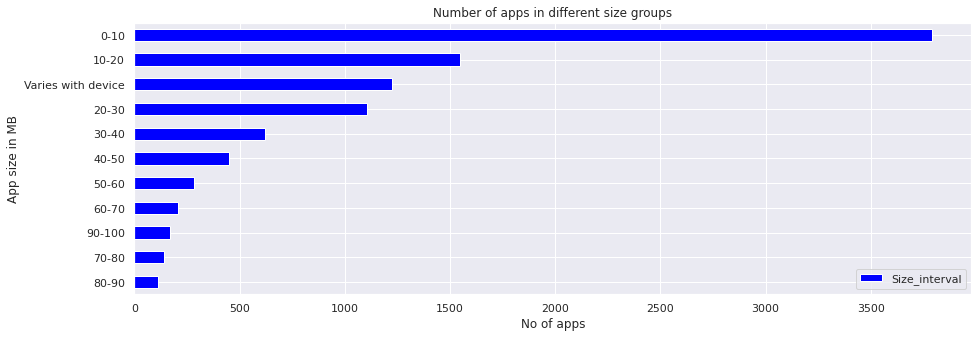

In [ ]:
# PLotting a size interval graph


Size_df['Size_interval'].value_counts().plot.barh(figsize=(15,5), color='Blue').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()


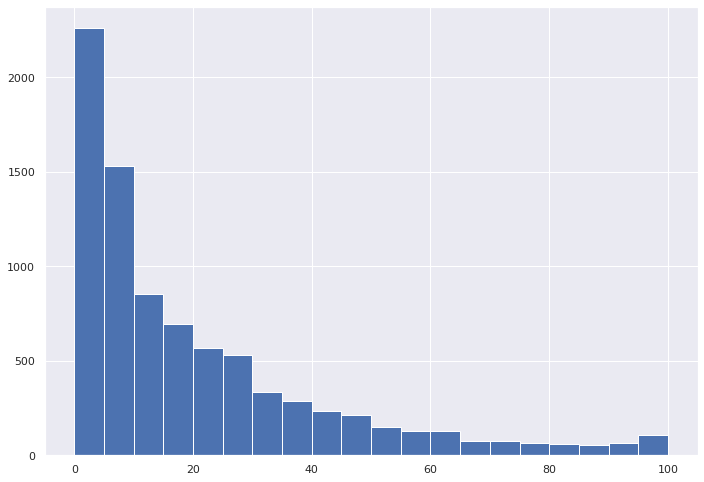

In [ ]:
#Plot a histogram for Size as well.
plt.hist(ddf.Size, bins=20)
plt.show()

# Exploratory Data Analysis
 

### 1.   Find out the number of Installs of the top 10 most expensive app's

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
3327,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4402,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4417,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
4413,I am Rich,FINANCE,4.3,180,3.8M,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up


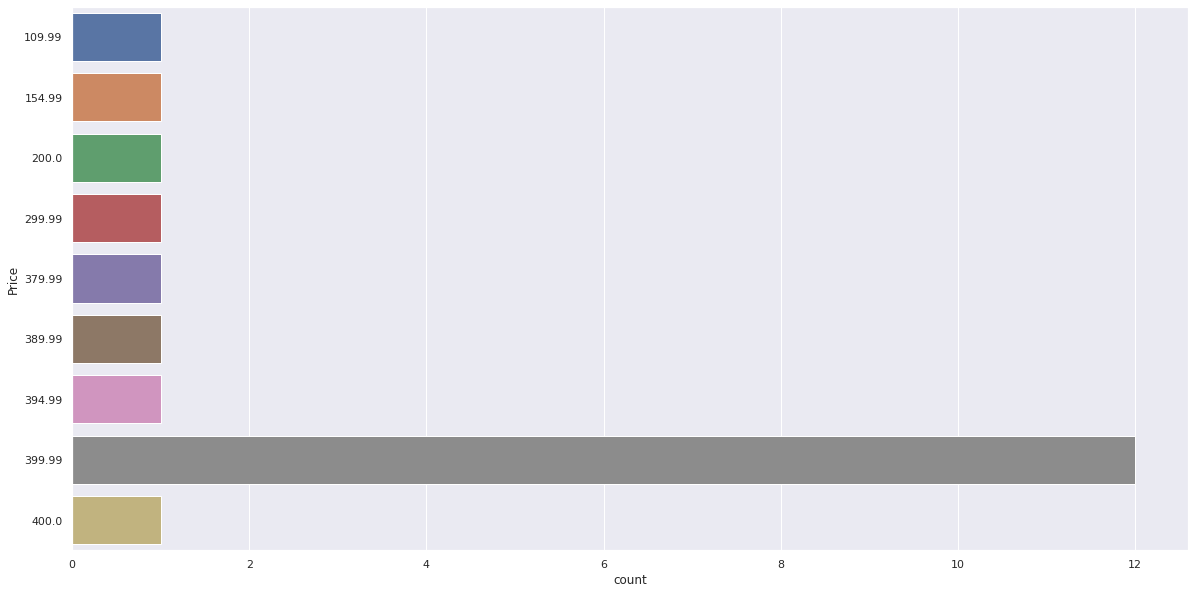

In [ ]:
plt.figure(figsize=(20,10))                               #Plotting a bar graph showing the number of installs vs Apps
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Price', data=Expen)                 #Using Expen dataframe which we created while cleaning Price column
Expen.sort_values(by='Price',ascending=False).head()    


**i'm Rich - Trump Edition	 is the most expensive application with 5000 installs**

### 2.   Which Category has more apps?

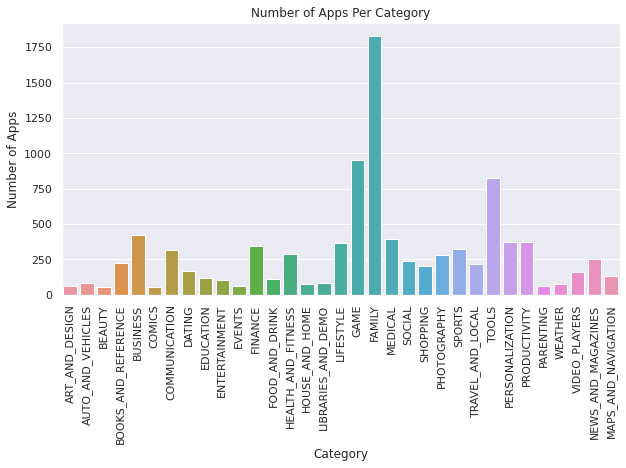

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

### 4.   What are the 5 top rated apps.





In [ ]:
ddf[ddf['Rating']==5].shape # We observe that there are 265 app with max rating 

(265, 13)

We observe that there are 265 app with max rating, we will sort out analysis further by  number of intalls and number of reviews to get a better picture. 

In [ ]:
ddf[ddf['Rating']==5].sort_values(by=['Installs','Reviews'],ascending=False ,ignore_index=True).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0,10000,Free,0.0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0
1,Oración CX,LIFESTYLE,5.0,103,3.8,5000,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1
2,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,5000,Free,0.0,Everyone,Comics,"July 31, 2018",1.0.5,5.0
3,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3.2,5000,Free,0.0,Everyone,Tools,"June 13, 2018",1.1.3,4.3
4,Ríos de Fe,LIFESTYLE,5.0,141,15.0,1000,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1


In [ ]:
#top5_rating_app = top10PaidApps[['App', 'Installs']]

### 5.Which are the Apps with the highest number of reviews?


In [ ]:
ddf.sort_values(by='Reviews',ascending=False ).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2002,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2003,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1372,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1


### 6. What is the average price of the apps for each genre with each installs numbers.

### 7. How many apps have rating > 4.7 and what is thier avg price.

### 8. How much google earned from the 5,000,000+ installed apps

### 10. is there a correlation between rating, Reviews, Size with the price of the app

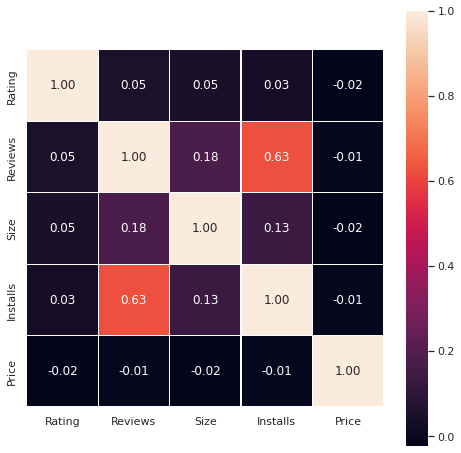

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(ddf.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

###11. app with highest number of installed 

In [ ]:
high_installed=ddf['Installs'].max()
high_installed

1000000000

In [ ]:
ddf[ddf['Installs']==1000000000].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
302,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
304,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
305,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
349,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
701,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1356,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1
2002,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [ ]:
ddf['Size'].isnull().sum()

1226

### 12. How many apps that can work on android version 4.2

In [ ]:
ddf[ddf['Android Ver']=='4.2']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.00,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17.0,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27.0,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,FP Live,COMMUNICATION,4.3,0,3.3,10,Free,0.00,Teen,Communication,"November 3, 2017",1.2.4,4.2
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2
9586,NFP 2018,EVENTS,4.8,8,16.0,500,Free,0.00,Everyone,Events,"January 9, 2018",1.0.3,4.2
9623,Scoreboard FR,LIFESTYLE,4.3,3,15.0,100,Free,0.00,Everyone,Lifestyle,"August 7, 2018",2.1,4.2


### 13. What is the ratio of Free app vs Paid app

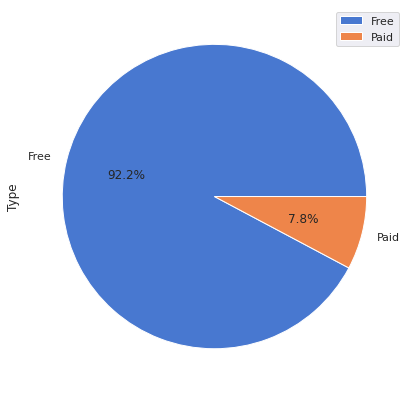

In [ ]:
ddf['Type'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%',colors = sns.color_palette('muted'))
plt.legend()

**Looking at above chart we can infer that there are 92.2% free apps & only 7.8% paid apps on google playstore**

### 14. New Section

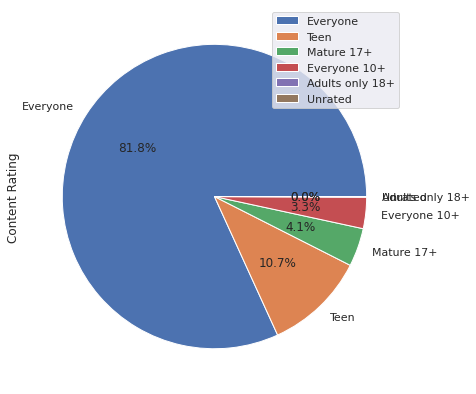

In [ ]:
ddf['Content Rating'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%')
plt.legend()

**From the above graph we can infer that 81.7 apps can be used by everyone other's app has age restrictions**

### 15. Which Category has the highest paid apps and Unpaid Apps

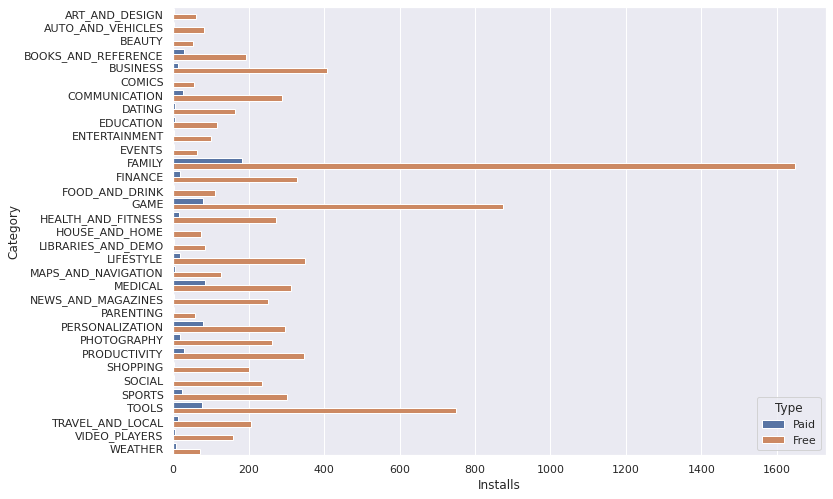

In [ ]:
price = ddf.groupby(['Category','Type'],as_index=False)['Installs'].count()
price=price.sort_values(['Category','Installs'])
sns.barplot(y="Category",x="Installs",hue="Type",data=price)


In [128]:
sns.scatterplot(data=ddf, x="Rewies", y="Installs")

ValueError: ignored